In [221]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#! conda install "numpy<1.20"
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e5/sample_submission.csv
/kaggle/input/playground-series-s4e5/train.csv
/kaggle/input/playground-series-s4e5/test.csv


In [222]:
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing   import StandardScaler
from boruta                  import BorutaPy



from sklearn.linear_model    import LinearRegression
from sklearn. linear_model   import Lasso
from sklearn.tree            import DecisionTreeRegressor
from sklearn.ensemble        import RandomForestRegressor
from sklearn.neighbors       import KNeighborsRegressor
from xgboost                 import XGBRegressor



from sklearn.model_selection import cross_val_score
from sklearn.metrics         import mean_squared_error
from sklearn                 import metrics 


In [223]:
train_data = pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")
df = pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")




In [224]:
#STATISTICAL DESCRIPTION OF DATA
df.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


## 2.0 Hypothesis
1 . Flood probability should be higher with higher urbanization

2 . Flood probability should be higher with higher Inadequate planning

3 . Seria interessante pegar as informações do outro Dataset.

4 . Flood probability should be higher with higher Deforestation 

5 . Flood probability should be higher with lower AgriculturalPractices

6 . Flood probability should be higher with lower TopographyDrainage


In [225]:
df.isna().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

## 3.0 EXPLORATORY DATA ANALYSIS

In [226]:
fp_corr = df.corr()
fp_corr['FloodProbability'].sort_values(ascending = False)

FloodProbability                   1.000000
DeterioratingInfrastructure        0.190007
MonsoonIntensity                   0.189098
DamsQuality                        0.187996
TopographyDrainage                 0.187635
RiverManagement                    0.187131
Siltation                          0.186789
PopulationScore                    0.185890
Landslides                         0.185346
ClimateChange                      0.184761
Deforestation                      0.184001
WetlandLoss                        0.183396
AgriculturalPractices              0.183366
IneffectiveDisasterPreparedness    0.183109
PoliticalFactors                   0.182417
Watersheds                         0.181907
InadequatePlanning                 0.180968
Urbanization                       0.180861
DrainageSystems                    0.179305
Encroachments                      0.178841
CoastalVulnerability               0.177774
id                                -0.000184
Name: FloodProbability, dtype: f

In [273]:
# train andb test split
train_data = pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s4e5/test.csv")

In [230]:

out=[]
def Zscore_outlier(train_data):
    m = np.mean(train_data)
    sd = np.std(train_data)
    for i in train_data: 
        z = (i-m)/sd
        if np.abs(z) < 4.5: 
            out.append(i)
    print(max(out))
    
    
    
for i in train_data.columns:
    out=[]
    print(i)
    Zscore_outlier(df[i])
    
    

id
1117956
MonsoonIntensity
14
TopographyDrainage
14
RiverManagement
14
Deforestation
14
Urbanization
14
ClimateChange
14
DamsQuality
14
Siltation
14
AgriculturalPractices
14
Encroachments
14
IneffectiveDisasterPreparedness
14
DrainageSystems
14
CoastalVulnerability
14
Landslides
14
Watersheds
14
DeterioratingInfrastructure
14
PopulationScore
14
WetlandLoss
14
InadequatePlanning
14
PoliticalFactors
14
FloodProbability
0.725


In [274]:
i = 14
df_clean = train_data[(train_data['MonsoonIntensity'] <i)&
  (train_data['TopographyDrainage'] <i)&
  (train_data['RiverManagement'] <i)&
  (train_data['Deforestation'] <i)&
  (train_data['Urbanization'] <i)&
  (train_data['ClimateChange'] <i)&
  (train_data['DamsQuality'] <i)&
  (train_data['Siltation'] <i)&
  (train_data['AgriculturalPractices'] <i)&
  (train_data['Encroachments'] <i)&
  (train_data['IneffectiveDisasterPreparedness'] <i)&
  (train_data['DrainageSystems'] <i)&
  (train_data['CoastalVulnerability'] <i)&
  (train_data['Landslides'] <i)&
  (train_data['Watersheds'] <i)&
  (train_data['DeterioratingInfrastructure'] <i)&
  (train_data['PopulationScore'] <i)&
  (train_data['WetlandLoss'] <i)&
  (train_data['InadequatePlanning'] <i)&
  (train_data['PoliticalFactors'] <i)]

## 4.0 Scaling


In [275]:
xtrain = df_clean.drop(columns=['FloodProbability', 'id'])
trainColumns = xtrain.columns

ytrain =df_clean['FloodProbability']


xtest = test_data.drop(columns=['id'])
testColumns = xtest.columns

In [276]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)



In [277]:
xtrain = pd.DataFrame(xtrain)
xtest = pd.DataFrame(xtest)

In [278]:
xtrain.columns = trainColumns
xtest.columns = testColumns

In [279]:
xtrain['id'] = train_data['id']
xtest['id'] = test_data['id']

## Boruta

In [ ]:
#! pip install -qq BorutaShap
#from BorutaShap import BorutaShap
#from xgboost import XGBRegressor
#model = XGBRegressor()

#featureSelection = BorutaShap(model = model, importance_measure='shap', classification=False)
#featureSelection.fit(X=xtrain, y=ytrain, n_trials=100, sample=True, train_or_test = 'train', normalize=True, verbose=True) 


In [ ]:
# Returns Boxplot of features
#featureSelection.plot(which_features='all')


## 6.0 MACHINE LEARNING

In [ ]:
#LINEAR REGRESSION
lr = LinearRegression().fit(xtrain, ytrain)
lr_pred = lr.predict(xtrain)
lr_result = metrics.r2_score(lr_pred, ytrain)

lr_cv_score = cross_val_score(estimator = lr, X = xtrain, y = ytrain, cv = 10)
lr_result_cv = lr_cv_score.mean()
lr_result_cv

In [ ]:
dt = DecisionTreeRegressor().fit(xtrain,ytrain)
dt_pred = dt.predict(xtrain)
dt_result = metrics.r2_score(dt_pred, ytrain)

dt_cv_score = cross_val_score(estimator = dt, X = xtrain, y = ytrain, cv = 10)
dt_result_cv = dt_cv_score.mean()
dt_result_cv

In [ ]:
from datetime import datetime
startTime = datetime.now()
rf = RandomForestRegressor(n_estimators=10, random_state=0).fit(xtrain,ytrain)
rf_pred = rf.predict(xtest)

#rf_cv_score = cross_val_score(estimator =rf , X = xtrain, y = ytrain, cv = 10)
#rf_result_cv = rf_cv_score.mean()
#rf_result_cv
endTime = datetime.now()



In [ ]:
xgb = XGBRegressor().fit(xtrain,ytrain)
xgb_pred = xgb.predict(xtrain)
xgb_result = metrics.r2_score(xgb_pred,ytrain)


xgb_cv_score = cross_val_score(estimator = xgb, X = xtrain, y = ytrain, cv = 10)
xgb_result_cv = xgb_cv_score.mean()
xgb_result_cv

In [ ]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha = 3, solver="auto")
rr = rr.fit(xtrain, ytrain)

rr_pred = rr.predict(xtrain)
rr_result = metrics.r2_score(rr_pred,ytrain)
rr_cv_score = cross_val_score(estimator = rr, X = xtrain, y = ytrain, cv = 10)
rr_cv_score = rr_cv_score.mean()
rr_cv_score

In [ ]:
#Score V1 retiramos os Outliers acima do valor 15
#score_v1 = pd.DataFrame({'Models':['Linear Regression','Decission Tree Regressor','Random Forest Regressor','XGBRegressor','Ridge Regressor'],
#             'R2':[lr_result,dt_result,0,xgb_result,rr_result],
#             'CV_R2':[lr_result_cv,dt_result_cv,0,xgb_result_cv,rr_cv_score]})
#score_v1 


#Score V2 retiramos os Outliers acima do valor 15 e vamos utilizar o MinMax Scaller
score_v2 = pd.DataFrame({'Models':['Linear Regression','Decission Tree Regressor','Random Forest Regressor','XGBRegressor','Ridge Regressor'],
             'R2':[lr_result,dt_result,rf_score,xgb_result,rr_result],
             'CV_R2':[lr_result_cv,dt_result_cv,rf_result_cv,xgb_result_cv,rr_cv_score]})
score_v2 

In [ ]:

from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

space = {'alpha': hp.uniform('alpha',0,10),
        'fit_intercept': hp.choice('fit_intercept',[True, False]),
        'max_iter': hp.choice('max_iter',[14000, 15000, 16000, 17000, 18000,19000]),
        'solver': hp.choice('solver',['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'])
    }

def objective(space):
    model = Ridge(alpha = space['alpha'], 
                fit_intercept = space['fit_intercept'],
                max_iter = space['max_iter'],
                solver = space['solver']
                )
    
    accuracy = cross_val_score(model, xtrain, ytrain, cv = 4).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }




trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 100,
            trials= trials)
best

In [280]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha = 0.04, fit_intercept = True, max_iter = 15000, solver = 'cholesky')
rr = rr.fit(xtrain, ytrain)
rr_pred = rr.predict(xtest)


In [282]:
sampleSubmission = pd.read_csv("/kaggle/input/playground-series-s4e5/sample_submission.csv")
sampleSubmission

,id,FloodProbability
0,1117957,0.5
1,1117958,0.5
2,1117959,0.5
3,1117960,0.5
4,1117961,0.5
...,...,...
745300,1863257,0.5
745301,1863258,0.5
745302,1863259,0.5
745303,1863260,0.5


In [283]:
sampleSubmission['FloodProbability'] = rr_pred
sampleSubmission

,id,FloodProbability
0,1117957,0.434953
1,1117958,0.338849
2,1117959,0.340830
3,1117960,0.351963
4,1117961,0.348131
...,...,...
745300,1863257,0.360447
745301,1863258,0.335521
745302,1863259,0.472352
745303,1863260,0.411868


In [285]:
from pathlib import Path 
import os
os.chdir('/kaggle/working/')

sampleSubmission.to_csv('/kaggle/working/SampleSubmission2.csv', sep=',', index=False)


<Axes: >

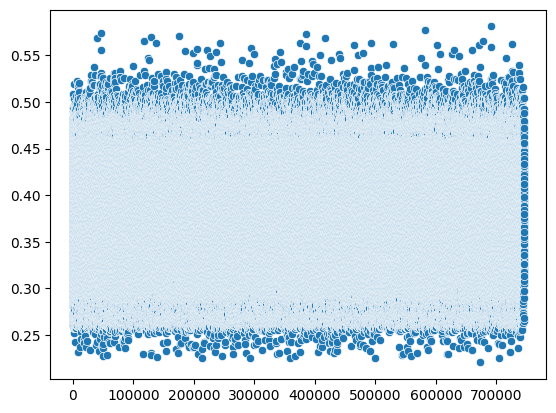

In [ ]:
sns.scatterplot()